#Aulas 5 e 6

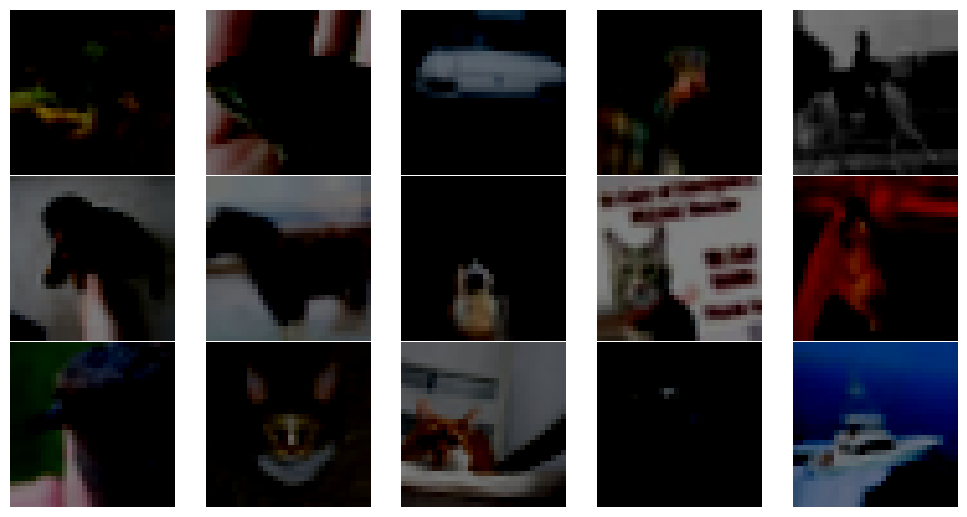

In [ ]:
from keras.datasets import cifar10, mnist, fashion_mnist
from keras.preprocessing import image
from keras.layers import Conv2D, Dense, Input, Flatten, Dropout
from keras.models import Model, Sequential, load_model
from keras.utils import to_categorical
from keras import optimizers
import keras
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt

(x_train, y_train), (x_val, y_val) = cifar10.load_data()
(ax, ay), (qx, qy) = cifar10.load_data()

x_train, x_val = x_train.astype('float32')/255.,  x_val.astype('float32')/255.
x_train -= 0.5; x_val -= 0.5
y_train, y_val = to_categorical(y_train), to_categorical(y_val)

train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        fill_mode='nearest',
        width_shift_range = 0.1,
        height_shift_range = 0.1)

train_datagen.fit(x_train)

plt.figure(figsize=(10,5))

for X_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=15):
    for i in range(0, 15):
        plt.subplot(3, 5, i+1)
        plt.imshow(X_batch[i].reshape(32, 32, 3), cmap=plt.get_cmap('gray'))
        plt.axis('off')
    plt.tight_layout(pad=0.1)
    plt.show()
    break

In [ ]:
model = load_model('resnet1.h5')

print(f'Baseline accuracy: {model.evaluate(x_val, y_val)[1]}')

313/313 [==============================] - 2s 6ms/step - loss: 0.4413 - accuracy: 0.9143
Baseline accuracy: 0.9143000245094299


In [ ]:
tta_steps = 11

test_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rotation_range=10.,
        fill_mode='nearest',
        width_shift_range = 0.1,
        height_shift_range = 0.1)

predictions = []
for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(test_datagen.flow(x_val, batch_size=bs, shuffle=False), steps = len(x_val)/bs)
    predictions.append(preds)

final_pred = np.mean(predictions, axis=0)

print(f'Accuracy with TTA: {np.mean(np.equal(np.argmax(y_val, axis=-1), np.argmax(final_pred, axis=-1)))}')

  0%|          | 0/11 [00:00<?, ?it/s]<ipython-input-44-5a17c7ba683a>:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_datagen.flow(x_val, batch_size=bs, shuffle=False), steps = len(x_val)/bs)
100%|██████████| 11/11 [01:08<00:00,  6.25s/it]

Accuracy with TTA: 0.9342


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


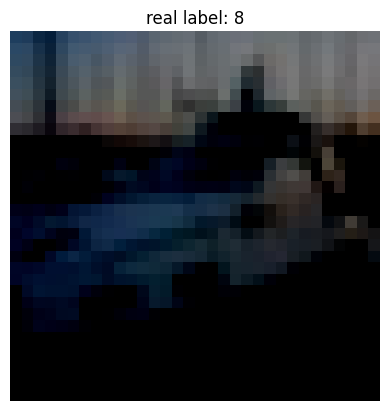

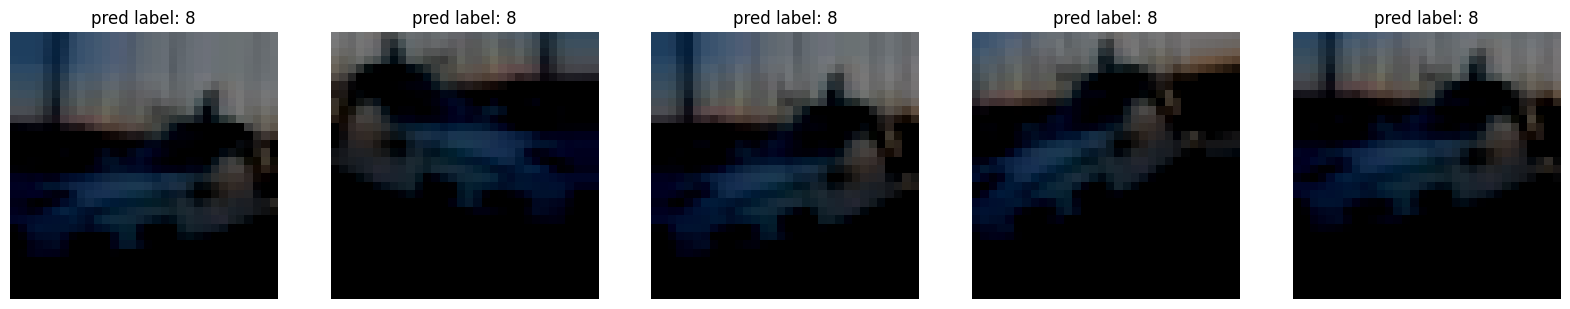

final pred: 8


In [ ]:
image_ix = 2
test_image = x_val[image_ix]
plt.imshow(test_image)
plt.title(f'real label: {np.argmax(y_val[image_ix])}')
plt.axis('off');

plt.figure(figsize=(20,14))
predictions = []

for i in range(5):
    im = test_datagen.flow(test_image.reshape(1,32,32,3), batch_size=1, shuffle=False)
    im = next(im)
    pred = model.predict(im.reshape(1,32,32,3))
    predictions.append(pred)
    plt.subplot(1, 5, i+1)
    plt.title(f'pred label: {np.argmax(pred)}')
    plt.imshow(im.reshape(32, 32, 3), cmap=plt.get_cmap('gray'))
    plt.axis('off')
plt.show()

final_pred = np.mean(predictions, axis=0)
print(f'final pred: {np.argmax(final_pred)}')